In [2]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import set_option
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [4]:
# Load dataset

In [5]:
filename = ("housing.csv")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names)

In [6]:
# Summarize data

In [9]:
dataset.shape

(506, 14)

In [10]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
# 'RM' is the average number of rooms among homes in the neighborhood.
# 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
# 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

In [16]:
# set_option('precision', 1)
# dataset.describe()

In [19]:
# correlation
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


In [20]:
# From Correlation data,
# We can confim that variable  LSTAT, RM, AGE and PTRATIO have good corelation with our output variable MEDV.
# These variables we need to consider when we optimze our predictive value

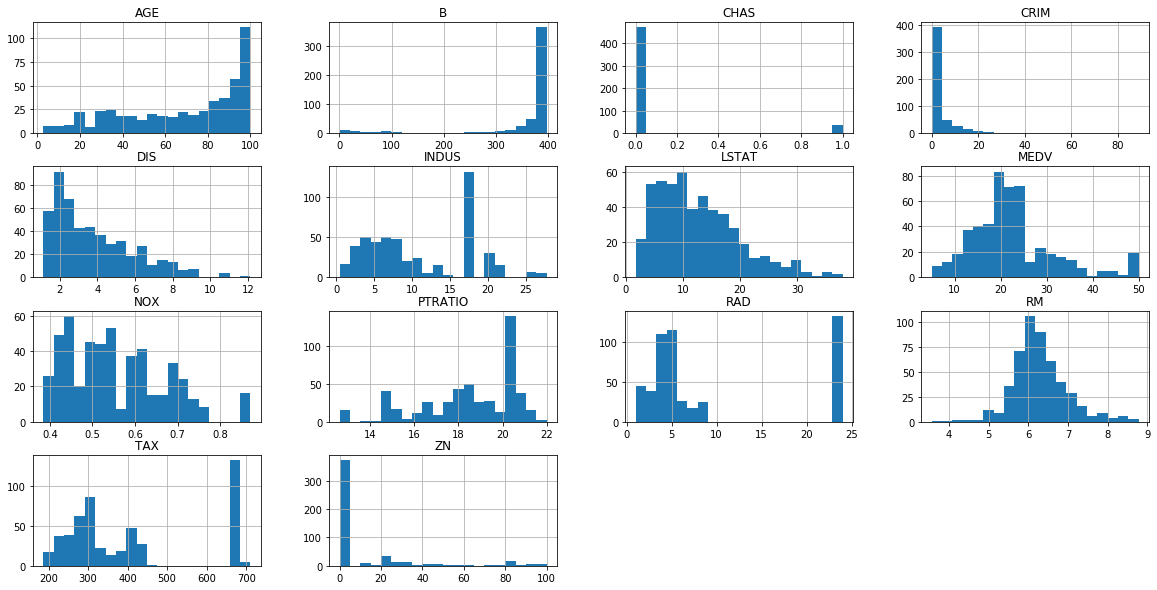

In [22]:
# Data visualizations

# histograms
dataset.hist(bins=20,figsize=(20,10),grid=True);

In [23]:
# We can see that some variables  have an exponential distribution, such as CRIM, ZN, AGE and B. 
# We can see that others  have a bimodal distribution such as RAD and TAX.
# I do feel features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
# # Analysis from above  data:
# 1)increase in RM value increases MEDV value ie price of the home.
# 2) Lower the value of LSTAT higher the value of MEDV
# 3) PTRATIO decrease in the value increases MEDV

In [24]:
prices = dataset['MEDV']
dataset = dataset.drop(['CRIM','ZN','INDUS','NOX','AGE','DIS','RAD'], axis = 1)
features = dataset.drop('MEDV', axis = 1)
dataset.head()
#features.head()

,CHAS,RM,TAX,PTRATIO,B,LSTAT,MEDV
0,0,6.58,296.0,15.3,396.90,4.98,24.0
1,0,6.42,242.0,17.8,396.90,9.14,21.6
2,0,7.18,242.0,17.8,392.83,4.03,34.7
3,0,7.00,222.0,18.7,394.63,2.94,33.4
4,0,7.15,222.0,18.7,396.90,5.33,36.2


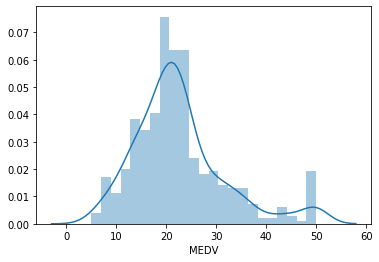

In [25]:
#histogram
sns.distplot(dataset['MEDV']);

In [26]:
# MEDV is Deviated from the normal distribution, have appreciable positive skewness and showed peakedness.
# Multivariate Visualization

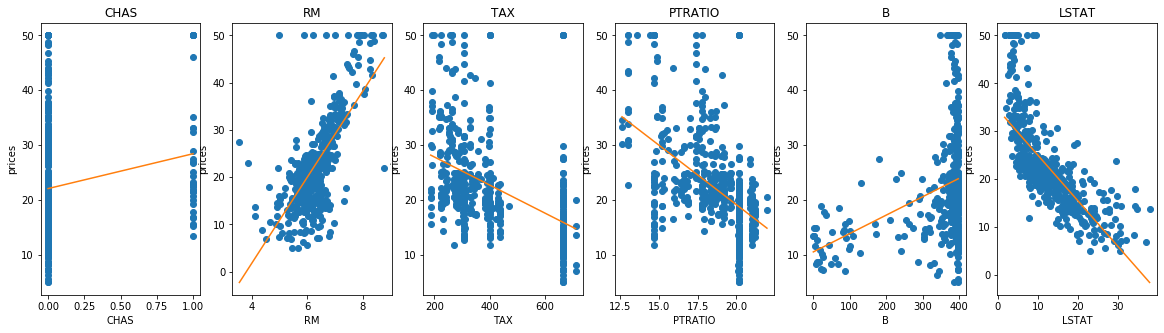

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 6, i+1)
    x = dataset[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(numpy.unique(x), numpy.poly1d(numpy.polyfit(x, y, 1))(numpy.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [28]:
# From my analysis, Price increases with RM and Price decreases with increase in PTRATO and LSTAT

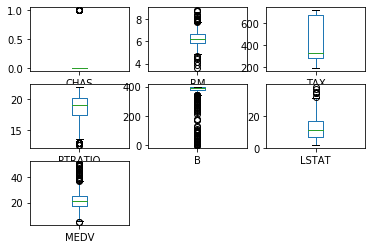

In [30]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

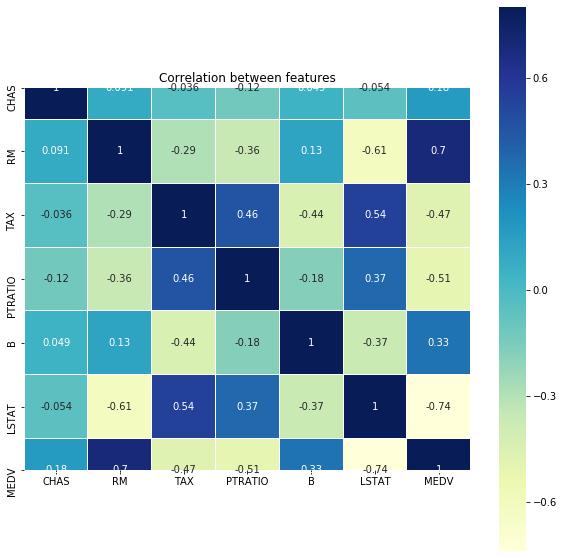

In [34]:
corr=dataset.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [35]:
# Variables having strong Corelation with target varible MEDV are RM (.7), LSTAT(-.74), PTRATIO(-.51) 

In [37]:
dataset.isnull().sum().max()
# check for missing values, no missing value

0

In [38]:
# # feature engineering
# # data standardization
# # The point here is to test 'MEDV' (Price) in a very lean way. We'll do this paying attention to:
# Histogram - Kurtosis and skewness.
# Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

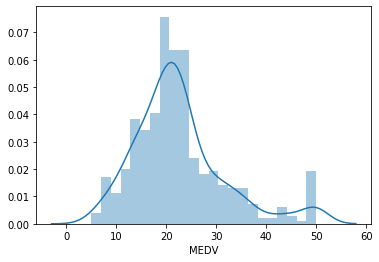

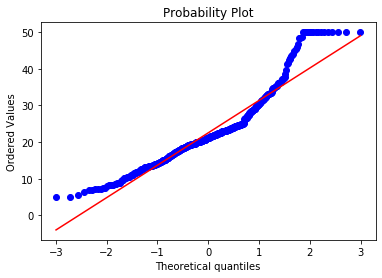

In [40]:
from scipy import stats
#histogram and normal probability plot
sns.distplot(dataset['MEDV'], hist=True);
fig = plt.figure()
res = stats.probplot(dataset['MEDV'], plot=plt)
#  It shows 'peakedness', positive skewness and does not follow the diagonal line.
#  A simple data transformation can solve the problem.  Will do in by standardizing the data

In [41]:
# prepare data
# Split-out validation dataset
array = dataset.values
X = array[:,0:6]
Y = array[:,6]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [43]:
# evaluate algorithm
# Test options and evaluation metric using Root Mean Square error method
num_folds = 10
seed = 7
RMS = 'neg_mean_squared_error'

In [44]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [45]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -23.768361 (8.605772)
LASSO: -27.493923 (10.882721)
EN: -29.810753 (11.625759)
KNN: -31.329157 (9.939710)
CART: -31.558668 (12.247057)
SVR: -80.981430 (31.368760)


/anaconda3/envs/yunsun/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/yunsun/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/yunsun/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/yunsun/lib/python3.6/site-packages/skle

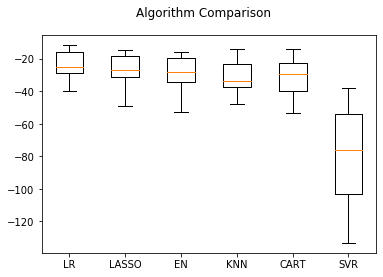

In [46]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [47]:
# standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: -23.768361 (8.605772)
ScaledLASSO: -26.587970 (8.961104)
ScaledEN: -27.884293 (9.961077)
ScaledKNN: -16.364071 (9.046376)
ScaledCART: -31.823907 (13.811862)
ScaledSVR: -26.613252 (16.072962)


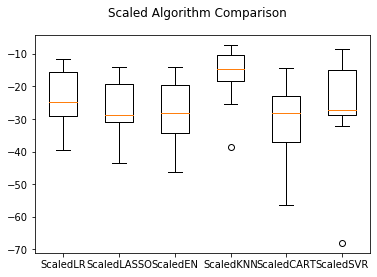

In [48]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [49]:
# KNN algorithms tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
dataset.shape

Best: -16.000790 using {'n_neighbors': 7}
-24.133094 (10.559892) with: {'n_neighbors': 1}
-16.202057 (8.184862) with: {'n_neighbors': 3}
-16.472066 (8.967071) with: {'n_neighbors': 5}
-16.000790 (9.611708) with: {'n_neighbors': 7}
-16.751550 (10.501406) with: {'n_neighbors': 9}
-17.854392 (11.162656) with: {'n_neighbors': 11}
-18.529700 (11.592646) with: {'n_neighbors': 13}
-18.516609 (10.518194) with: {'n_neighbors': 15}
-19.254440 (10.270674) with: {'n_neighbors': 17}
-20.002164 (10.009585) with: {'n_neighbors': 19}
-20.138334 (9.663304) with: {'n_neighbors': 21}


/anaconda3/envs/yunsun/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(506, 7)

In [50]:
# ensembles
ensembles = []
ensembles.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
dataset.shape

ScaledKNN: -16.364071 (9.046376)
ScaledAB: -18.054025 (6.366576)
ScaledGBM: -12.012767 (6.391095)
ScaledRF: -16.182043 (8.254975)
ScaledET: -13.002490 (5.967095)


/anaconda3/envs/yunsun/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/yunsun/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/yunsun/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/yunsun/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/yunsun/lib/python3.6/site-pa

(506, 7)

In [51]:
# When we compare, GBM has better accuracy than KNN

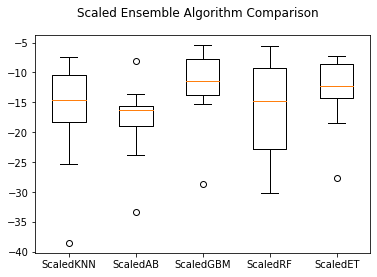

In [52]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [53]:
# So Our chosen Algorithm is GBM and letz tune
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -11.830068 using {'n_estimators': 200}
-12.479635 (6.348297) with: {'n_estimators': 50}
-12.102737 (6.441597) with: {'n_estimators': 100}
-11.843649 (6.631569) with: {'n_estimators': 150}
-11.830068 (6.559724) with: {'n_estimators': 200}
-11.879805 (6.512414) with: {'n_estimators': 250}
-11.895362 (6.487726) with: {'n_estimators': 300}
-12.008611 (6.468623) with: {'n_estimators': 350}
-12.053759 (6.453899) with: {'n_estimators': 400}


/anaconda3/envs/yunsun/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [54]:
# Make predictions on validation dataset
# our model is ready for prediction with out validation set

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

26.326748591395717


In [56]:
predictions=predictions.astype(int)
submission = pd.DataFrame({
        "Org House Price": Y_validation,
        "Pred House Price": predictions
    })

submission.to_csv("PredictedPrice.csv", index=False)